# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machineLearning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**Approach**:  
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
[Link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept stage, we'll pursue the project.


## 4. Features


This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age age in years
* sex(1 = male; 0 = female)  
* cp chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalach maximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0

## Preparing the tools

Importing all needed libraries

In [44]:
# Regular EDA (exploratory data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, roc_curve, plot_roc_curve

## Load Data

In [45]:
df = pd.read_csv("../../data/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (exploratory data analysis (EDA))

Become a subject matter export on the dataset you're working with

1. What question(s) are you trying to solve?
2. Wnat kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where areThe outliners and why should you care about them?
5. How can ou add, change or remove features to get more out of your data?

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Find out how many target values exist
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Note:** This is a balanced classification problem.

In [48]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

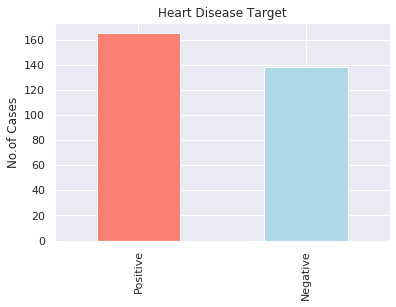

In [49]:
df.target.value_counts().plot(kind='bar',
                              color=['salmon', 'lightblue'])
plt.ylabel('No.of Cases')
plt.title('Heart Disease Target')
plt.xticks([0,1], ('Positive', 'Negative'));

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
# Missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


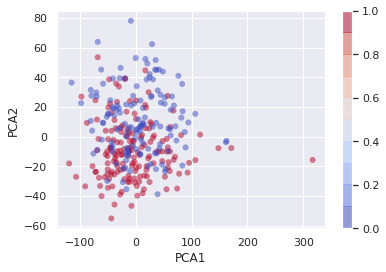

In [53]:
# Visualize dataset
from sklearn.decomposition import PCA

# instantiate model with 2 dimensions
pca = PCA(2)

# project from 14 to 2 dimensions
projected = pca.fit_transform(df)

# plot
plt.scatter(projected[:,0], projected[:,1],
            c=df.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('coolwarm', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

### Heart Disease Frequency according to Gender

In [54]:
# 1 is male, 0 is female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [55]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


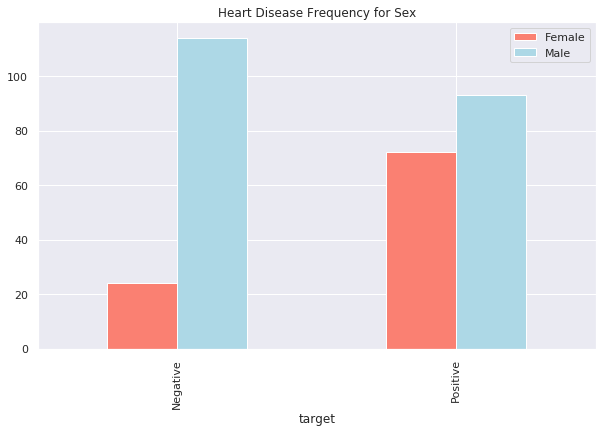

In [56]:
# Create a pot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])
plt.xticks([0,1], ('Negative', 'Positive'))
plt.legend(labels=['Female', 'Male'])
plt.title('Heart Disease Frequency for Sex');

In [57]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

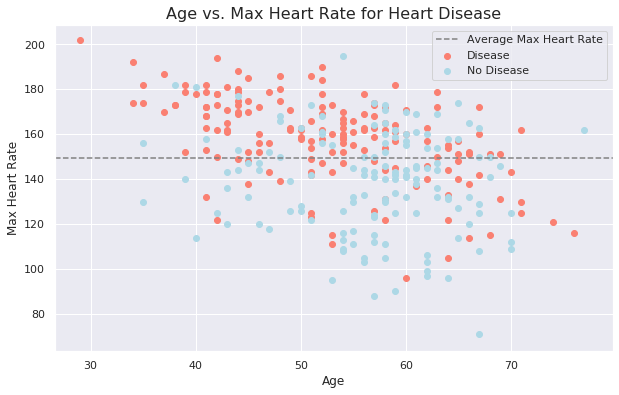

In [58]:
plt.figure(figsize=(10,6))

# Scatter with positive samples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            label='Positive Samples',
            c='salmon')

# Scatter with negative samples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            label='Negative Samples',
            c='lightblue')

plt.axhline(df.thalach.mean(), linestyle='--', color='grey')
plt.title('Age vs. Max Heart Rate for Heart Disease', fontdict={'fontsize': 16})
plt.legend(labels=['Average Max Heart Rate', 'Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

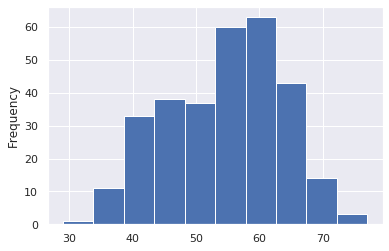

In [59]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

In [60]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


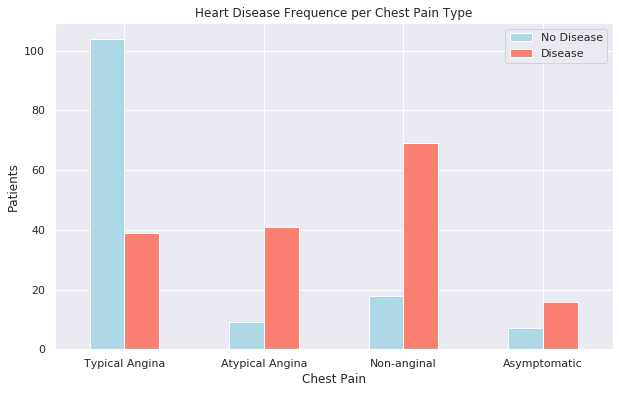

In [61]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['lightblue', 'salmon'])
plt.title('Heart Disease Frequence per Chest Pain Type')
plt.xticks(np.arange(4), ('Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'),
           rotation=0)
plt.xlabel('Chest Pain')
plt.ylabel('Patients')
plt.legend(labels=['No Disease', 'Disease']);

In [62]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


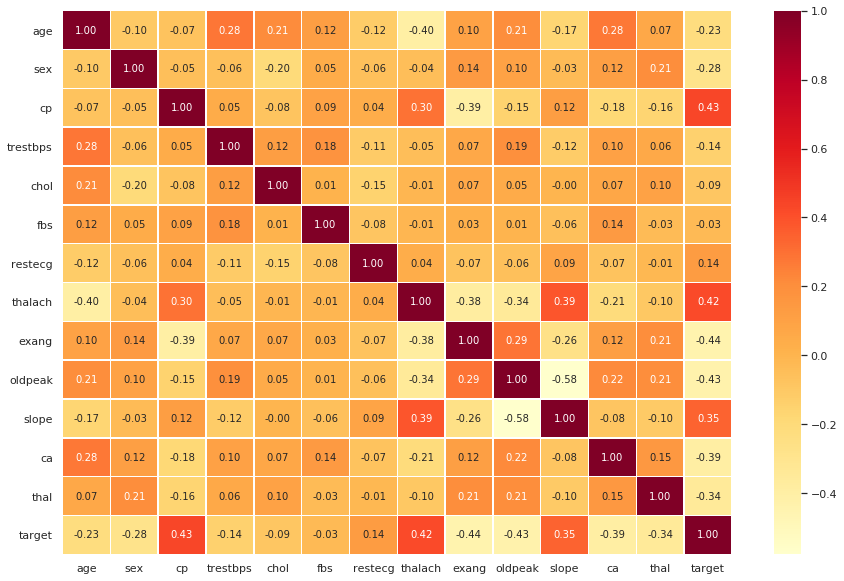

In [63]:
# Use heatmap to visualize correlation table
corr_m = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_m,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlOrRd',
                 cbar=True);

## 5. Modelling

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df.target
X.shape, y.shape

((303, 13), (303,))

In [66]:
# Split data into train and test sets
np.random.seed(44)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

We're going to try _three_ different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest

In [67]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, Xtrain, Xtest, ytrain, ytest):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    Xtrain: training data (no labels)
    Xtest: testing data (no labels)
    ytrain: training labels
    ytest: test labels
    """
    # Set random seed
    np.random.seed(44)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(Xtrain, ytrain)
        # evaluate model and append score
        model_scores[name] = model.score(Xtest, ytest)
    return model_scores

In [68]:
model_scores = fit_and_score(models=models,
                             Xtrain=Xtrain,
                             Xtest=Xtest,
                             ytrain=ytrain,
                             ytest=ytest)
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

## Model Comparison

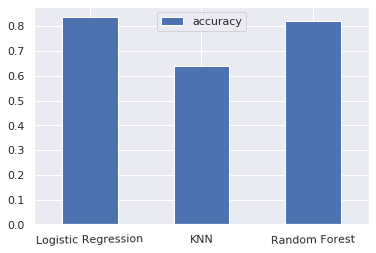

In [69]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=1);

How to improve the baseline metrics?

| classification | regression                     |
| ---------------| -------------------------------|
| **accuracy**   | **r^2**                        |
| precision      | mean absolute error            |
| recall         | maen squared error (MSE)       |
| f1             | root mean squared error (RMSE) |

Ideas:

* hyperparameter tuning
* feature importance
* confusion matrix
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve (AUC)

## Hyperparameter Tuning (by Hand)

In [70]:
# Tune KNN
np.random.seed(44)

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit algorithm
    knn.fit(Xtrain, ytrain)
    
    # Update training scores list
    train_scores.append(knn.score(Xtrain, ytrain))
    
    # Update test_scores list
    test_scores.append(knn.score(Xtest, ytest))

In [71]:
train_scores

[1.0,
 0.7768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.7479338842975206,
 0.743801652892562,
 0.7107438016528925,
 0.7107438016528925,
 0.6983471074380165,
 0.6900826446280992,
 0.6611570247933884,
 0.6776859504132231,
 0.6942148760330579,
 0.6652892561983471,
 0.6776859504132231,
 0.6859504132231405,
 0.6776859504132231,
 0.6570247933884298,
 0.6776859504132231,
 0.6570247933884298]

In [72]:
test_scores

[0.6721311475409836,
 0.5901639344262295,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853]

Maximum KNN score on test data: 73.77%


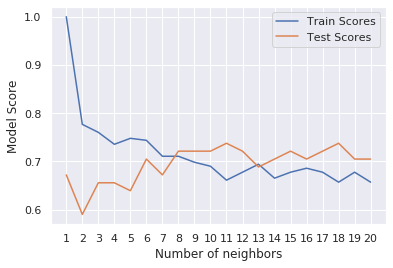

In [73]:
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparamter Tuning with RandomizedSearchCV 

We're going to tune:
* LogisticRegression
* RandomForestClassifier

### Tuning Logistic Regression

In [74]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [75]:
# Tune Logistic Regression

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(Xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}

In [77]:
rs_log_reg.score(Xtest, ytest)

0.8524590163934426

### Tuning Random Forest

In [78]:
# Tune Random Forest

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf_reg.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [79]:
rs_rf_reg.best_params_

{'n_estimators': 560,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [80]:
# Evaluate the tuned model
rs_rf_reg.score(Xtest, ytest)

0.8360655737704918

### Compare hypertuned models

In [81]:
tuned_model_scores = fit_and_score(models={'RS Logistic Regression': rs_log_reg,
                                           'RS Random Forest': rs_rf_reg},
                                   Xtrain=Xtrain,
                                   Xtest=Xtest,
                                   ytrain=ytrain,
                                   ytest=ytest)
tuned_model_scores

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.5s finished


{'RS Logistic Regression': 0.8524590163934426,
 'RS Random Forest': 0.8360655737704918}

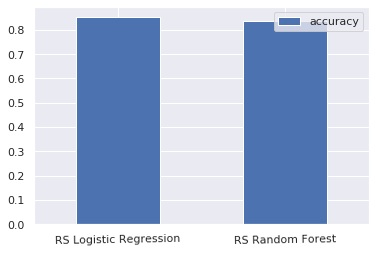

In [82]:
tuned_model_compare = pd.DataFrame(tuned_model_scores, index=['accuracy'])
tuned_model_compare.T.plot.bar()
plt.xticks(rotation=1);

## Hyperparameter Tuning with GridSearchCV

Since our Logisti Regression model provides the best scores so far, we'll try to improve the model further using GridSearchCV

In [83]:
# Create a hyperparameter grid for LogisticRegression with liblinear solver
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_liblinear = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_liblinear.fit(Xtrain, ytrain)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [84]:
# Check best parameters
gs_log_reg_liblinear.best_params_

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}

In [85]:
# Evaluate grid search Logistic Regression model
gs_log_reg_liblinear.score(Xtest, ytest)

0.8360655737704918

In [86]:
# Create a hyperparameter grid for LogisticRegression
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_liblinear = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_liblinear.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [87]:
# Create a hyperparameter grid for LogisticRegression with lbfgs solver
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': [None, 'l2'],
                'solver': ['lbfgs']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_lbfgs = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_lbfgs.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [88]:
gs_log_reg_lbfgs.best_params_

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}

In [89]:
gs_log_reg_lbfgs.score(Xtest, ytest)

0.8360655737704918

In [90]:
rs_model_scores = fit_and_score(models={'Baseline Logistic Regression': LogisticRegression(max_iter=1000),
                                        'RS Log. Regression': rs_log_reg,
                                        'Grid Search with liblinear': gs_log_reg_liblinear,
                                        'Grid Search with lbfgs': gs_log_reg_lbfgs},
                                   Xtrain=Xtrain,
                                   Xtest=Xtest,
                                   ytrain=ytrain,
                                   ytest=ytest)
rs_model_scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


{'Baseline Logistic Regression': 0.8360655737704918,
 'RS Log. Regression': 0.8524590163934426,
 'Grid Search with liblinear': 0.8360655737704918,
 'Grid Search with lbfgs': 0.8360655737704918}

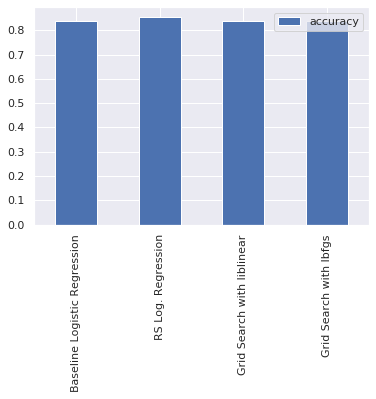

In [91]:
rs_model_compare = pd.DataFrame(rs_model_scores, index=['accuracy'])
rs_model_compare.T.plot.bar();

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve, AUC curve
* Confusion matrix
* Classificatoin report
* Precision
* Recall
* F1-score

... with cross-validation where possible.

To make comparions and evaluate our trained model, we need to make predictions first.

### ROC curve and AUC metric

In [92]:
# Make predictions with best tuned model on test/train-split data-
ypreds = rs_log_reg.predict(Xtest)

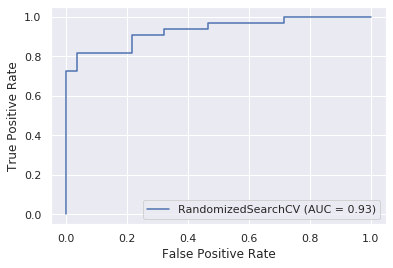

In [93]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, Xtest, ytest);

### Confusion Matrix

In [94]:
# Confusion matrix
cm = confusion_matrix(ytest, ypreds)

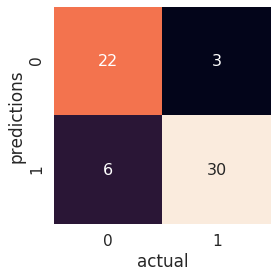

In [95]:
# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm.T, annot=True, fmt='d', annot_kws={"size": 16}, square=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predictions');

### Classifiction Report

In [96]:
# Classification Report on train/test-split data
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Cross-validated evaluation metrics

In [97]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}

In [98]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.08858667904100823,
                         solver='liblinear',
                         penalty='l2')

In [99]:
def average_metric(clf, X, y, scoring):
    """
    Returns the average score on each scoring metric, rounded to 2 decimals.
    clf: scikit-learn classification
    X: features (no labels)
    y: labels
    scoring: scoring metric
    """
    return round((np.mean(cross_val_score(clf, X, y, cv=5, scoring=scoring))), 2)
    
                 
def average_score_on_cross_val_classification(clf, X, y):
    """
    Evaluates a given model/estimator using cross-validation (5 folds)
    and returns a dict containing the average (mean) scores
    for classification models
    
    clf: scikit-learn classification
    X: features (no labels)
    y: labels
    """
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores = {metric: average_metric(clf, X, y, metric) for metric in metrics}
    
    return scores

In [100]:
cv_metrics = average_score_on_cross_val_classification(clf, X, y)
cv_metrics

{'accuracy': 0.83, 'precision': 0.82, 'recall': 0.9, 'f1': 0.86}

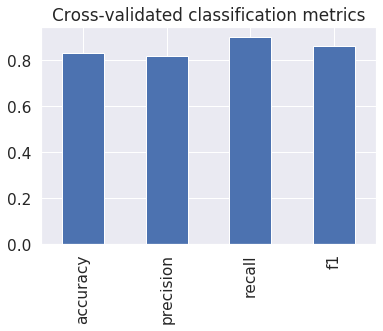

In [101]:
# Create visualization
cv_metrics_df = pd.DataFrame(cv_metrics, index=[0])

cv_metrics_df.T.plot.bar(title='Cross-validated classification metrics',
                         legend=False);

### Feature Importance

“Which features contributed most to the outcomes ofThe model and how did they contribute?”

Finding feature importance is different for each machine learning model.

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# Fit hypertuned Logistic Regression (Random Search CV)
clf.fit(Xtrain, ytrain)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# Find coefficients
clf.coef_

array([[ 0.00305159, -0.55009021,  0.58672357, -0.01500117, -0.00195454,
         0.02959291,  0.2253154 ,  0.02664186, -0.43634871, -0.38550966,
         0.28330878, -0.54120566, -0.58456057]])

In [105]:
# Match coefficents to feature names
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0030515915939375647,
 'sex': -0.5500902053638502,
 'cp': 0.5867235747280033,
 'trestbps': -0.015001171510006078,
 'chol': -0.0019545371352882525,
 'fbs': 0.02959291220337285,
 'restecg': 0.22531540323876867,
 'thalach': 0.026641855152839657,
 'exang': -0.4363487092506885,
 'oldpeak': -0.38550965702590584,
 'slope': 0.2833087846172982,
 'ca': -0.5412056624406907,
 'thal': -0.5845605699874679}

In [106]:
feature_importance = pd.DataFrame(feature_dict, index=['importance']).T
feature_importance

,importance
age,0.003052
sex,-0.550090
cp,0.586724
trestbps,-0.015001
chol,-0.001955
fbs,0.029593
restecg,0.225315
thalach,0.026642
exang,-0.436349
oldpeak,-0.385510


In [107]:
sorted_feature_importance = feature_importance.sort_values(by='importance', ascending=False)
sorted_feature_importance

,importance
cp,0.586724
slope,0.283309
restecg,0.225315
fbs,0.029593
thalach,0.026642
age,0.003052
chol,-0.001955
trestbps,-0.015001
oldpeak,-0.385510
exang,-0.436349


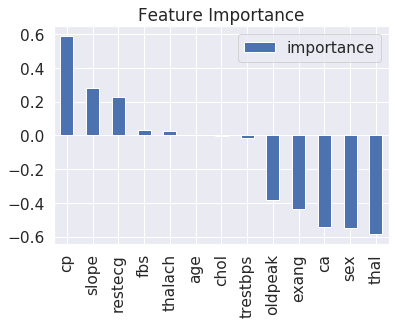

In [108]:
sorted_feature_importance.plot.bar(title='Feature Importance');

In [109]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [110]:
pd.crosstab(df['ca'], df['target'])

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


## Experiment With Removing Features With Low Coefficiennt

In [111]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
reduced_df = df.drop(['thal', 'chol', 'age', 'trestbps', 'fbs'], axis=1)

In [113]:
reduced_df.head()

,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,target
0,1,3,0,150,0,2.3,0,0,1
1,1,2,1,187,0,3.5,0,0,1
2,0,1,0,172,0,1.4,2,0,1
3,1,1,1,178,0,0.8,2,0,1
4,0,0,1,163,1,0.6,2,0,1


In [114]:
# Train LogisticRegression model on reduced data set

np.random.seed(44)

X = reduced_df.drop('target', axis=1)
y = reduced_df['target']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [115]:
# Create a new classifier with best parameters from previous run
reduced = LogisticRegression(C=0.08858667904100823,
                         solver='liblinear',
                         penalty='l2')

In [116]:
reduced.fit(Xtrain, ytrain)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
reduced.score(Xtest, ytest)

0.8524590163934426

In [118]:
average_score_on_cross_val_classification(reduced, X, y)

{'accuracy': 0.83, 'precision': 0.81, 'recall': 0.91, 'f1': 0.86}

In [119]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid_reduced = {'C': np.logspace(-4, 4, 20),
                        'penalty': ['l1', 'l2'],
                        'solver': ['liblinear']}

In [120]:
# Tune Logistic Regression

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg_reduced = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_reduced,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg_reduced.fit(Xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [121]:
rs_log_reg_reduced.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [122]:
# Create a new classifier with best parameters from previous run
reduced = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear',
                         penalty='l2')

In [123]:
# Evaluate the tuned model
reduced.fit(Xtrain, ytrain)
cv_metrics_reduced = average_score_on_cross_val_classification(reduced, X, y)
cv_metrics_reduced

{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.92, 'f1': 0.87}

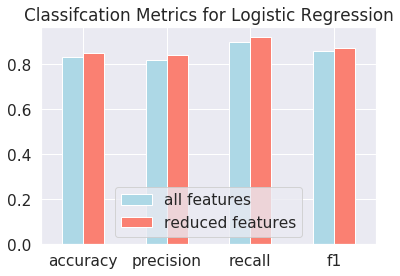

In [124]:
# Create visualization
compare_metrics_df = pd.DataFrame({'all features': cv_metrics,
                                   'reduced features': cv_metrics_reduced},
                                  index=cv_metrics.keys())

compare_metrics_df.plot.bar(title='Classifcation Metrics for Logistic Regression',
                            rot=0,
                            color=['lightblue', 'salmon'])

In [125]:
cv_metrics

{'accuracy': 0.83, 'precision': 0.82, 'recall': 0.9, 'f1': 0.86}

In [126]:
cv_metrics_reduced

{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.92, 'f1': 0.87}

**Result**: Slight improvment by reducing features

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself:

* Could we collect more data?
* Could we try a better model? Like CatBoostor XGBoost?
* Could we improve the curent models (beyond what we've done so far)?